#                                             EDA for students 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

data = pd.read_csv('stud_math.csv')
display(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [2]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [76]:
data.school.value_counts()


GP    349
MS     46
Name: school, dtype: int64

<AxesSubplot:>

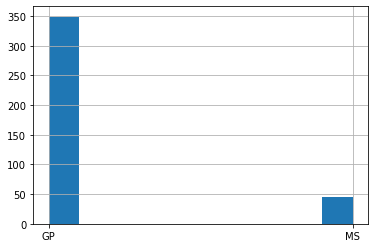

In [77]:
data.school.hist()

### Практически все студенты - ученики одной школы. Можем удалять столбец.

In [83]:
data.drop(['school'], inplace=True, axis = 1)

F    208
M    187
Name: sex, dtype: int64


<AxesSubplot:>

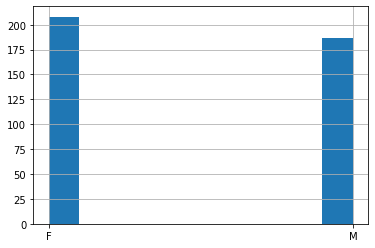

In [85]:
print(data.sex.value_counts())
data.sex.hist()

### Практически равное соотношение мальчиков и девочек.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

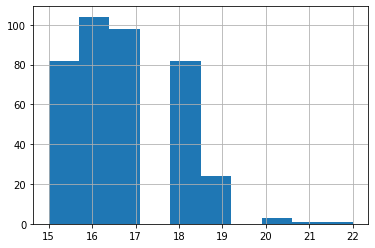

In [15]:
data.age.hist()
data.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Пустых значений -  0


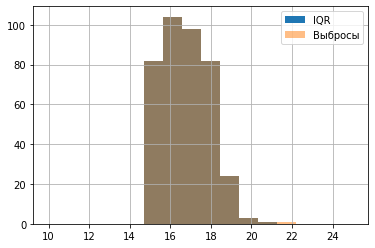

In [88]:
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
perc25 = data.age.quantile(0.25)
perc75 = data.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

data.age.loc[data.age.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(10, 25), label='IQR')

data.age.loc[data.age <= 100].hist(
    alpha=0.5, bins=16, range=(10, 25), label='Выбросы')

plt.legend()
print("Пустых значений - ", data.age.isna().sum())

### основное кол-во студентов в возрасте от 15 до 18 лет. Есть выбросы. Пустых значений нет.

U    295
R     83
Name: address, dtype: int64 Пустых значений -  0


<AxesSubplot:>

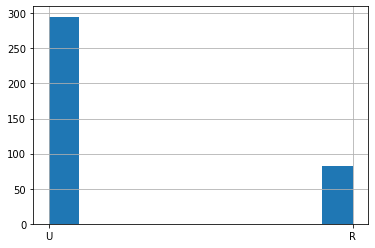

In [95]:
print(data.address.value_counts(), "Пустых значений - ", data.age.isna().sum())
data.address.hist()

### Большинство проживает в городе.

Пустых значений -  27 GT3    261
LE3    107
Name: famsize, dtype: int64


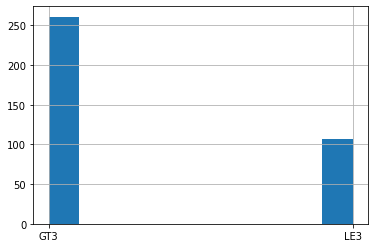

In [96]:
data.famsize.hist()
print("Пустых значений - ", data.famsize.isna().sum(), data.famsize.value_counts())

### 27 семей с пустым значением. Остальное на графике.

Empty -  45


<AxesSubplot:>

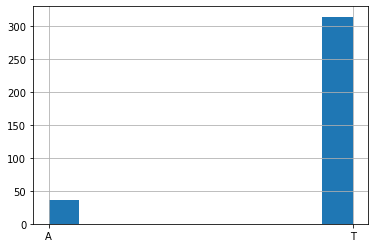

In [155]:
print("Empty - ", data.Pstatus.isna().sum())
data.Pstatus.hist()

### большинство живет вместе.

array([[<AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>],
       [<AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'failures'}>, <AxesSubplot:>]],
      dtype=object)

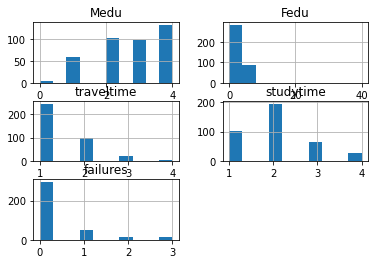

In [166]:
data[['Medu', 'Fedu', 'traveltime',	'studytime', 'failures']].hist()

array([[<AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>, <AxesSubplot:>]],
      dtype=object)

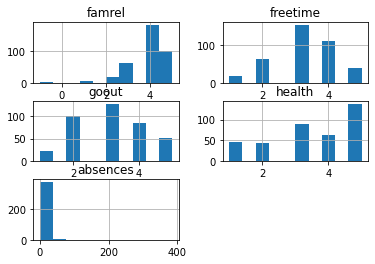

In [162]:
data[['famrel', 'freetime', 'goout', 'health', 'absences']].hist()

### в целом выше среднего отмечены подготовки с родителями, однако время на учебу и путешествия в основном ниже среднего, неудач было крайне мало, а отношения в семье и свободное время остались на высоком уровне.

Empty -  19 other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


<AxesSubplot:>

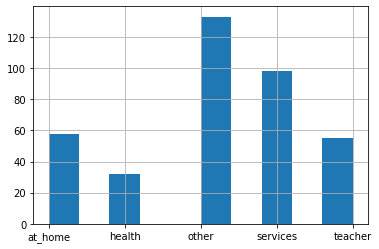

In [170]:
print("Empty - ", data.Mjob.isna().sum(), data.Mjob.value_counts())
data.Mjob.hist()

Empty -  36 
 other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


<AxesSubplot:>

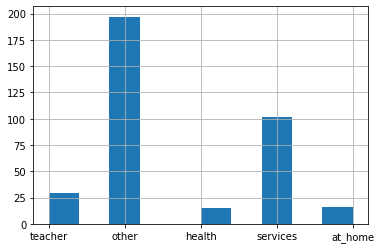

In [174]:
print("Empty - ", data.Fjob.isna().sum(), '\n', data.Fjob.value_counts())
data.Fjob.hist()

### большинство родителей работают в других сферах, однако на втором месте по популярности места работы стоит в обоих случаях сфера услуг.

Empty -  17 
 course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


<AxesSubplot:>

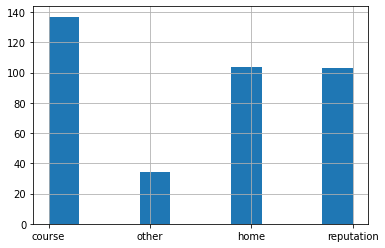

In [177]:
print("Empty - ", data.reason.isna().sum(), '\n', data.reason.value_counts())
data.reason.hist()

### ключевым фактором является программа обучения, а близость к дому и репутация имеют равное значение

Empty -  31 
 mother    250
father     86
other      28
Name: guardian, dtype: int64


<AxesSubplot:>

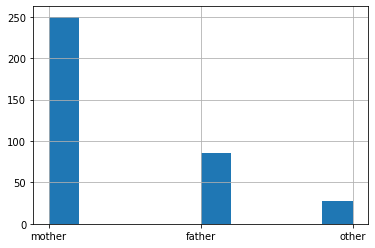

In [178]:
print("Empty - ", data.guardian.isna().sum(),
      '\n', data.guardian.value_counts())
data.guardian.hist()

### в основном мать, в 31 одном случае даже не смогли определить кто

Empty -  40 
 no     200
yes    155
Name: paid, dtype: int64


<AxesSubplot:>

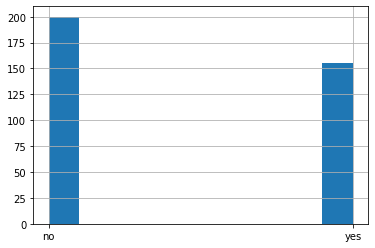

In [179]:
print("Empty - ", data.paid.isna().sum(), '\n', data.paid.value_counts())
data.paid.hist()

### примерно равное распределение

Empty -  14 
 yes    195
no     186
Name: activities, dtype: int64


<AxesSubplot:>

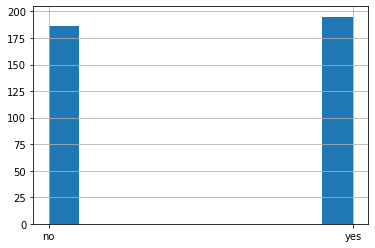

In [180]:
print("Empty - ", data.activities.isna().sum(),
      '\n', data.activities.value_counts())
data.activities.hist()

### примерно равное распределение

Empty -  16 
 yes    300
no      79
Name: nursery, dtype: int64


<AxesSubplot:>

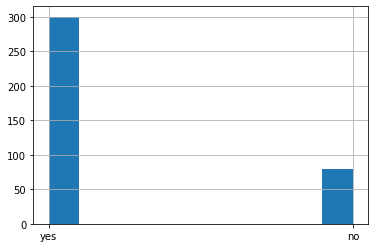

In [181]:
print("Empty - ", data.nursery.isna().sum(), '\n', data.nursery.value_counts())
data.nursery.hist()

### большинство посещало дет.сад

Empty -  20 
 yes    356
no      19
Name: higher, dtype: int64


<AxesSubplot:>

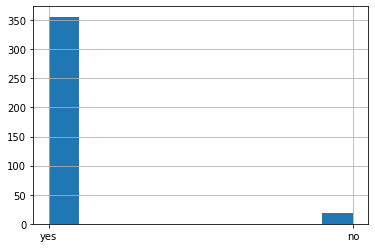

In [182]:
print("Empty - ", data.higher.isna().sum(), '\n', data.higher.value_counts())
data.higher.hist()

### подавляющее большинство имеет желание получить высшее образование

Empty -  34 
 yes    305
no      56
Name: internet, dtype: int64


<AxesSubplot:>

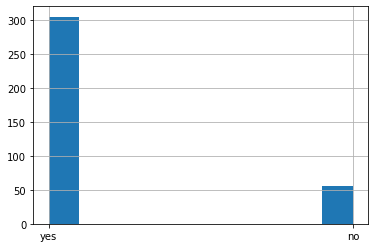

In [183]:
print("Empty - ", data.internet.isna().sum(),
      '\n', data.internet.value_counts())
data.internet.hist()

### у 56 человек дома нет интернета, странно

Empty -  31 
 no     240
yes    124
Name: romantic, dtype: int64


<AxesSubplot:>

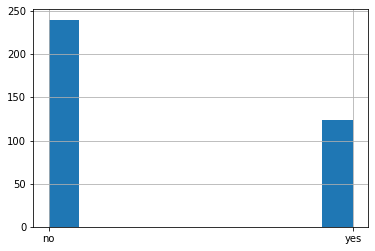

In [184]:
print("Empty - ", data.romantic.isna().sum(),
      '\n', data.romantic.value_counts())
data.romantic.hist()

### 124 человека состояли в романтических отношениях на момент сдачи тестов, 240 нет, 31 не увидели эту графу в бланке

<AxesSubplot:title={'center':'Половое распределение'}, xlabel='sex', ylabel='score'>

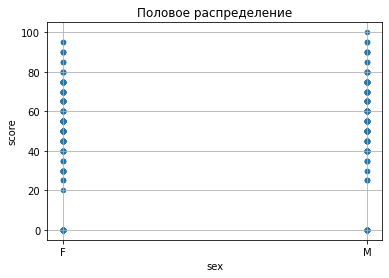

In [206]:
data.plot(x='sex',
          y='score',
          kind='scatter',
          grid=True,
          title='Половое распределение')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Половое распределение'}, xlabel='age', ylabel='score'>

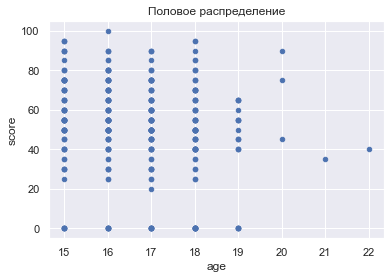

In [209]:
data.plot(x='age',
          y='score',
          kind='scatter',
          grid=True,
          title='Половое распределение')

### мы видим, что общий уровень мужчин выше, чем женщин, особенно в возрасте 16-18 лет

D:\Study\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

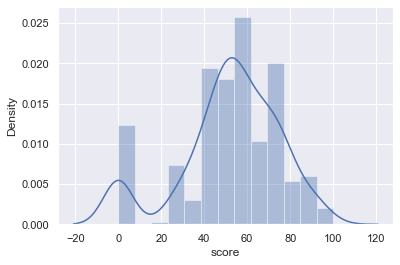

In [208]:
sns.set()
sns.distplot(data['score'])

### очень похоже на нормальное распределение

## Небольшой блок аналитики "чистого" датафрейма - в котором удалены все строки, содержание значения "nan".

In [109]:
filtered_data = data.dropna(how='any')
display(filtered_data)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,M,15,U,GT3,A,2.0,2.0,other,other,home,other,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,M,18,R,GT3,T,2.0,1.0,other,other,other,mother,2.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
386,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


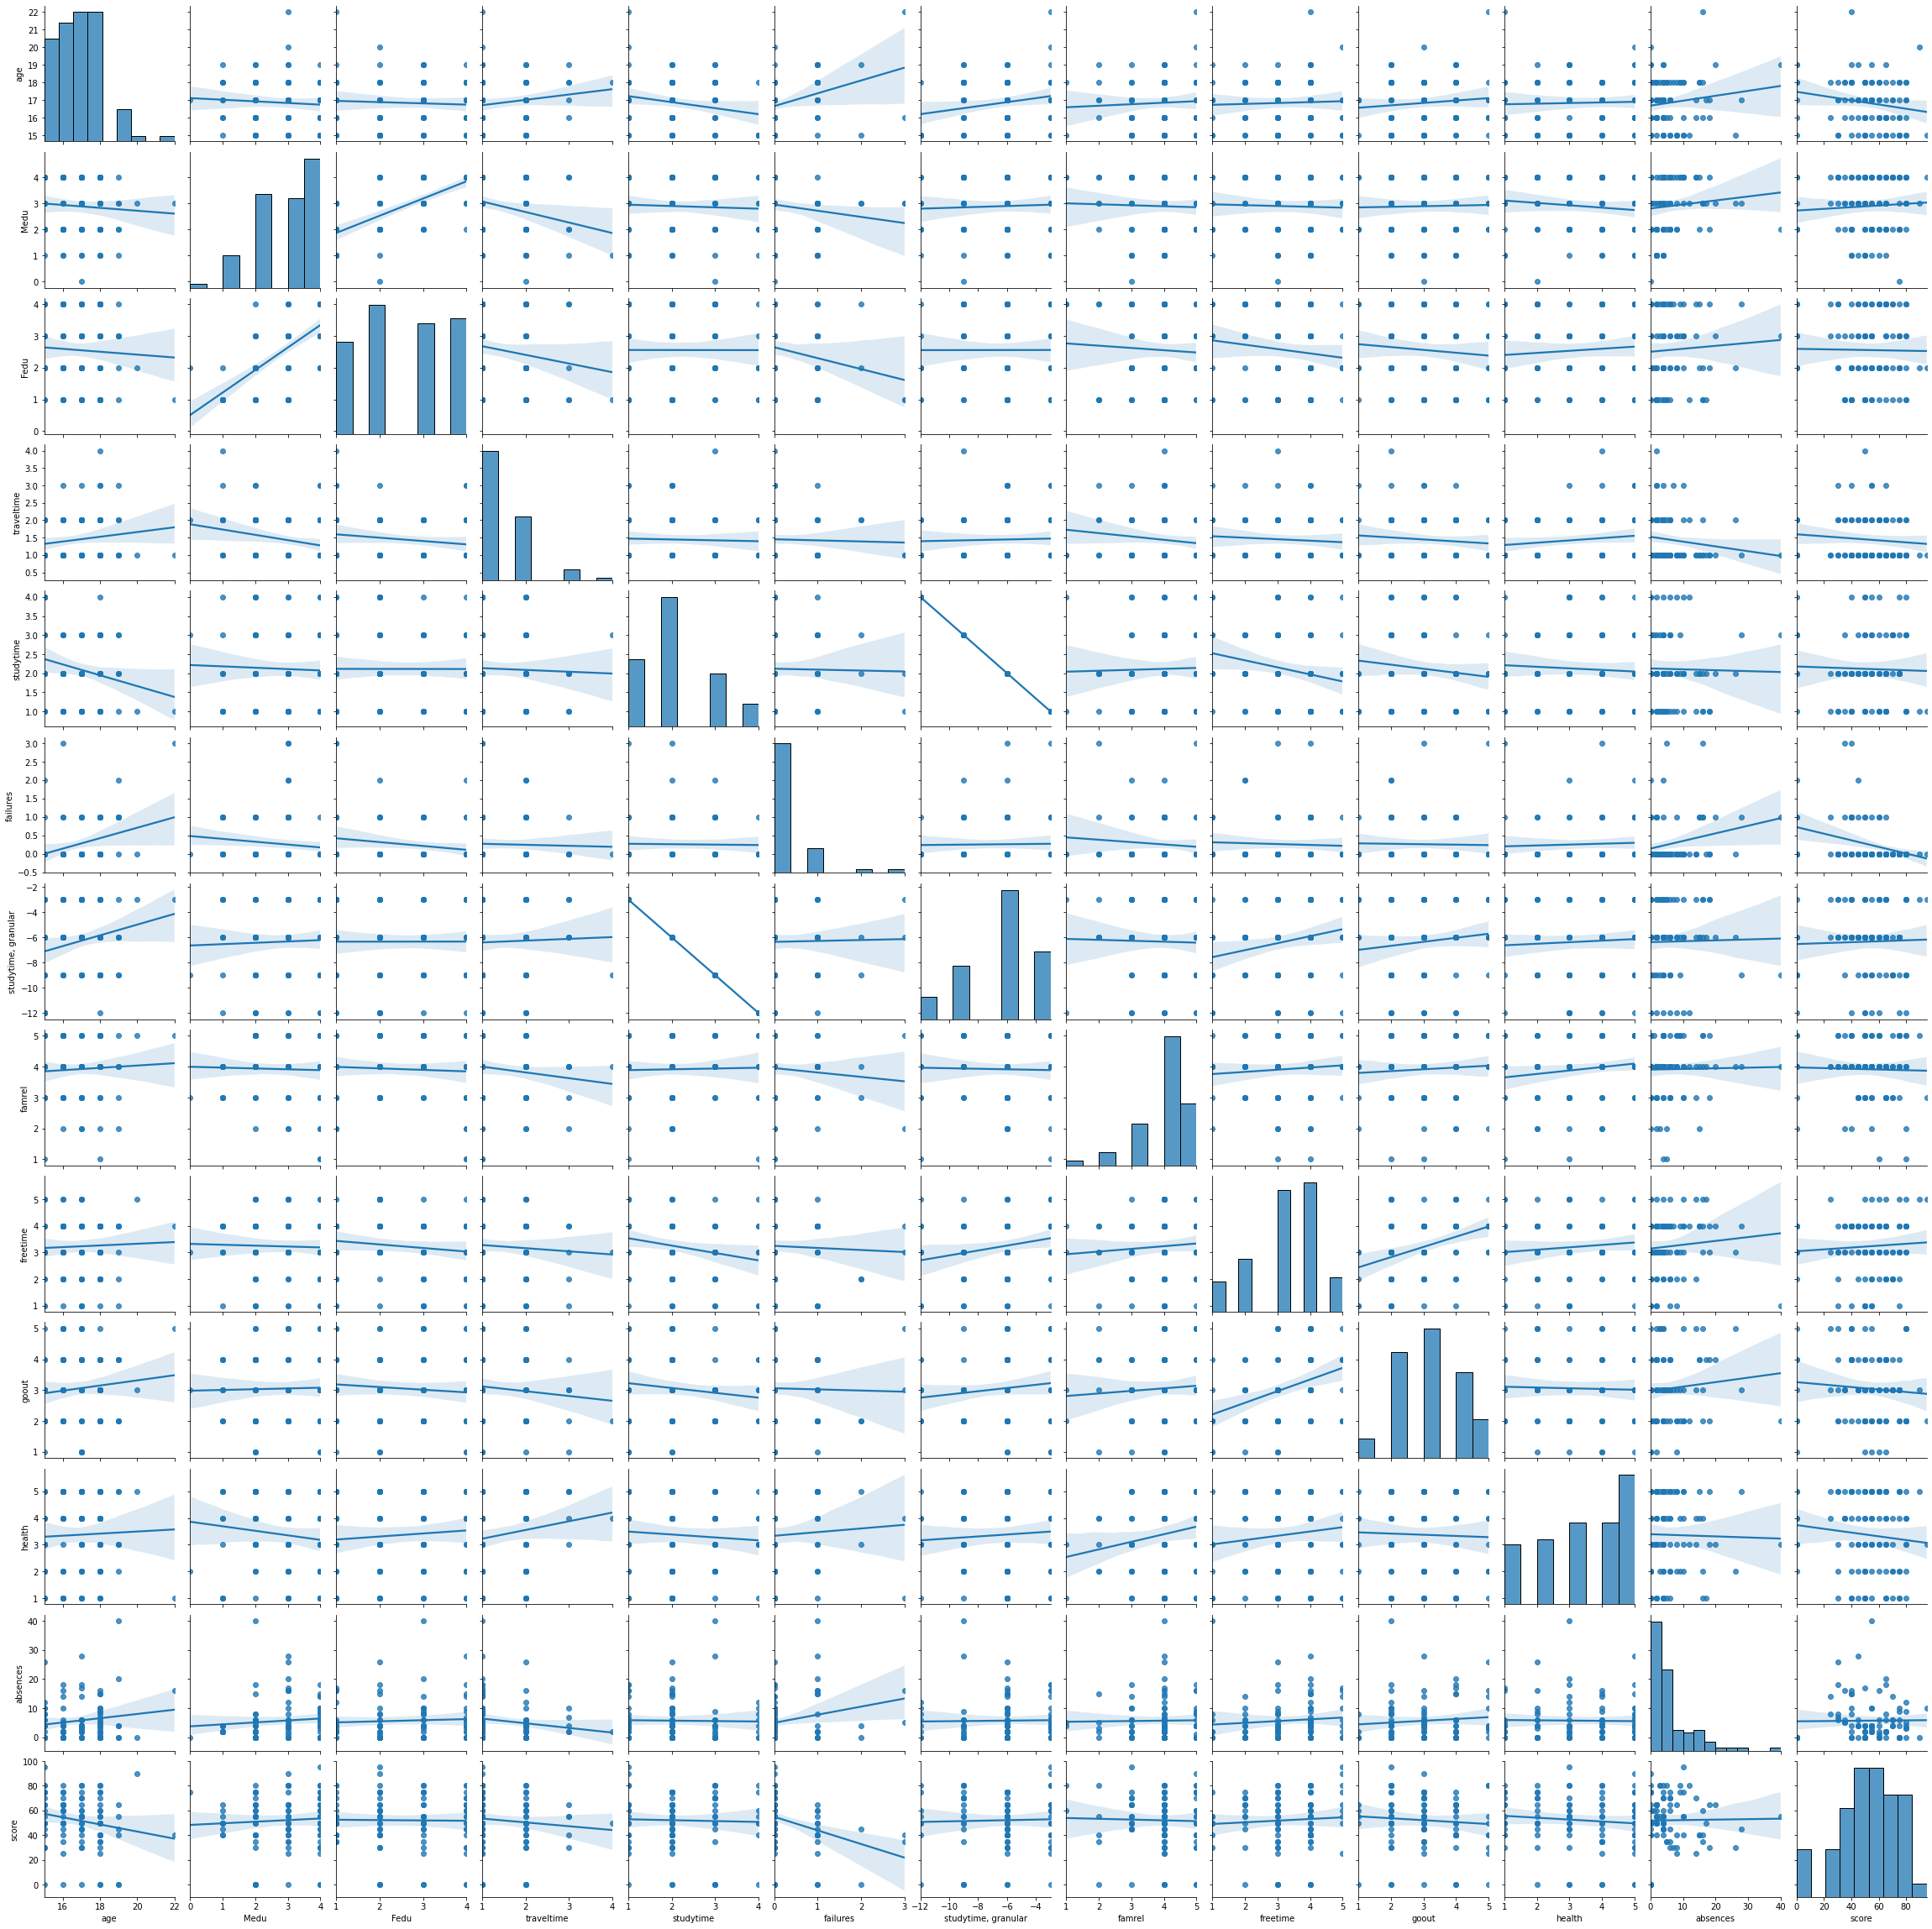

#### ого, тут можно час провести за просмотром всех табличек, нужно сделать что-то более понятное и наглядное...

In [120]:
filtered_data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,0.143682,-0.220209,0.320914,0.220209,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
Medu,-0.071662,1.000000,0.684379,-0.248099,-0.042491,-0.135065,0.042491,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
Fedu,-0.056929,0.684379,1.000000,-0.162149,-0.001350,-0.189926,0.001350,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,0.143682,-0.248099,-0.162149,1.000000,-0.034571,-0.029138,0.034571,-0.134113,-0.071376,-0.094331,0.147160,-0.148719,-0.094874
studytime,-0.220209,-0.042491,-0.001350,-0.034571,1.000000,-0.016541,-1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
failures,0.320914,-0.135065,-0.189926,-0.029138,-0.016541,1.000000,0.016541,-0.095520,-0.043110,-0.021022,0.057279,0.239602,-0.314698
"studytime, granular",0.220209,0.042491,0.001350,0.034571,-1.000000,0.016541,1.000000,-0.025253,0.226503,0.129162,0.067115,0.018695,0.029742
famrel,0.057039,-0.032146,-0.059084,-0.134113,0.025253,-0.095520,-0.025253,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.071376,-0.226503,-0.043110,0.226503,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.094331,-0.129162,-0.021022,0.129162,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187


#### еще более понятное и наглядное...

<AxesSubplot:>

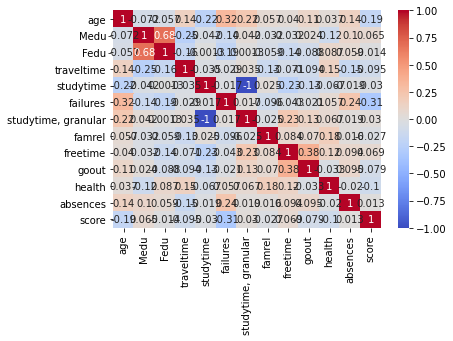

In [113]:
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm')

### анализ данной таблицы позволяет утверждать, что хороший балл напрямую связан с хорошей подготовкой от мамы, а также наличия свободного времени и грамотного его сочетания со верменем учебы.


Для отведавших школьный суп средний балл за экзамен  45.0, а медиана  47.5
Для голодных студентов средний балл за экзамен  53.25301204819277, а медиана  55.0


D:\Study\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Study\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


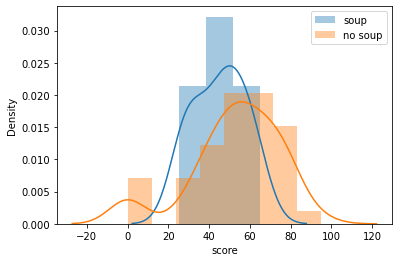

In [127]:
stud = filtered_data[['schoolsup', 'score']]
sns.distplot(stud[stud.schoolsup == 'yes'].score, label='soup')
sns.distplot(stud[stud.schoolsup == 'no'].score, label='no soup')
plt.legend()
print('Для отведавших школьный суп средний балл за экзамен  {}, а медиана  {}'.format(
    stud[stud.schoolsup == 'yes'].score.mean(), stud[stud.schoolsup == 'yes'].score.median()))
print('Для голодных студентов средний балл за экзамен  {}, а медиана  {}'.format(
    stud[stud.schoolsup == 'no'].score.mean(), stud[stud.schoolsup == 'no'].score.median()))

### оказывается, голодные студенты были результативнее сытых... Я такого не ожидал, нужно проверить тщательнее.

Для поевших домашний суп средний балл за экзамен  49.91379310344828, а медиана  50.0
Для голодных студентов средний балл за экзамен  55.256410256410255, а медиана  55.0


D:\Study\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


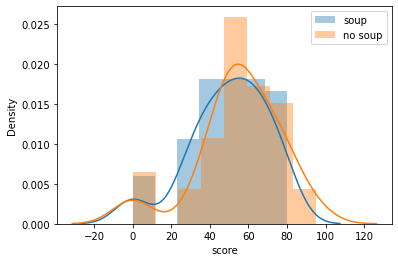

In [139]:
stud = filtered_data[['famsup', 'score']]
sns.distplot(stud[stud.famsup == 'yes'].score, label='soup')
sns.distplot(stud[stud.famsup == 'no'].score, label='no soup')
plt.legend()
print('Для поевших домашний суп средний балл за экзамен  {}, а медиана  {}'.format(
    stud[stud.famsup == 'yes'].score.mean(), stud[stud.famsup == 'yes'].score.median()))
print('Для голодных студентов средний балл за экзамен  {}, а медиана  {}'.format(
    stud[stud.famsup == 'no'].score.mean(), stud[stud.famsup == 'no'].score.median()))

### здесь уже чуть поровнее, но все равно голодные студенты показали лучший результат.

Для поевших домашний суп средний балл за экзамен  43.63636363636363, а медиана  40.0
Для голодных студентов средний балл за экзамен  55.69444444444444, а медиана  55.0


D:\Study\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Study\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


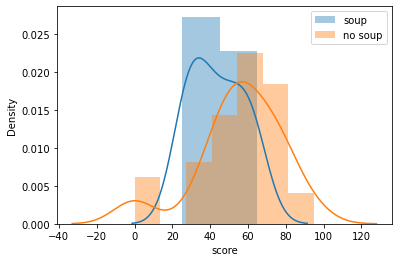

In [143]:
stud = filtered_data[['schoolsup', 'famsup', 'score']]
stud_yes = stud[stud.schoolsup == 'yes']
stud_no = stud[stud.schoolsup == 'no']
sns.distplot(stud_yes[stud_yes.famsup == 'yes'].score, label='soup')
sns.distplot(stud_no[stud_no.famsup == 'no'].score, label='no soup')
plt.legend()
print('Для поевших домашний суп средний балл за экзамен  {}, а медиана  {}'.format(
    stud_yes[stud_yes.famsup == 'yes'].score.mean(), stud_yes[stud_yes.famsup == 'yes'].score.median()))
print('Для голодных студентов средний балл за экзамен  {}, а медиана  {}'.format(
    stud_no[stud_no.famsup == 'no'].score.mean(), stud_no[stud_no.famsup == 'no'].score.median()))

### ВОТ ОНА - ИСТИНА! Студенты, поевшие и дома, и в школе - показали результат гораздо хуже, чем студенты, писавшие экзамен натощак. Средний балл сытых студентов - 43.6, средний балл студентов натощак - 55.7! Отсюда делаем вывод, что чем голоднее студент - тем он результативнее (хотя со мной всегда наоборот)

# в целом, чтобы иметь наибольшие шансы на успешную сдачу теста, вам необходимо: быть мужчиной возрастом 16-18 лет, проживающим в городе вместе с семьей, с вами хорошо должна поработать мама, впрочем, неважно, какой она профессии, скорее всего, работает в сфере услуг. Скорее всего, на путешествия вам времени не хватало, но зато времени на учебу вы не жалели, у вас нет проблем со здоровьем, вы хотите получить высшее образование. Несмотря на хорошие отношения в семье, утром в день тестирование лучше пренебрегите завтраком, причем как дома, так и в школе и будьте уверены, что минимум 55 баллов вам обеспечены!